In [3]:
#!/usr/bin/env python
# coding: utf-8

# In[71]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
# In[72]:


df = pd.read_csv('C:/Users/sonaa/Downloads/jobs_db.csv')
df.head()


,pull_date,Company,Job Title,raw_location,Posting URL,MBA,Job Description,Function,Level,Office,Job Status,Categories,Location,clean_title,Closed
0,1/31/2022,Ascend Wellness Holdings,Cannabis Rotational Program,"New York, New York, United States",https://boards.greenhouse.io/awholdings/jobs/4...,No,Looking to get your foot in the door at a fast...,business,entry,In-Office,External,"General Sales,","New York, NY",cannabis rotational program,5/24/2022
1,1/31/2022,Ascend Wellness Holdings,Cannabis Rotational Program,"Boston, Massachusetts, United States",https://boards.greenhouse.io/awholdings/jobs/4...,No,Looking to get your foot in the door at a fast...,business,entry,In-Office,External,"General Sales,","Boston, MA",cannabis rotational program,5/24/2022
2,1/31/2022,Ascend Wellness Holdings,Cannabis Rotational Program,"Chicago, Illinois, United States",https://boards.greenhouse.io/awholdings/jobs/4...,No,Looking to get your foot in the door at a fast...,business,entry,In-Office,External,"General Sales,","Chicago, IL",cannabis rotational program,5/24/2022
3,1/31/2022,Ascend Wellness Holdings,"Director, Compliance (MA)","Boston, Massachusetts, United States",https://boards.greenhouse.io/awholdings/jobs/4...,No,The Director of Compliance (MA) will manage an...,business,director,In-Office,External,"General Sales,","Boston, MA",director compliance ma,5/24/2022
4,1/31/2022,Ascend Wellness Holdings,"Manager, Compliance (Athol, MA)","Athol, Massachusetts, United States",https://boards.greenhouse.io/awholdings/jobs/4...,No,The State Compliance Manager will report to th...,business,manager,In-Office,External,"General Sales,","Boston, MA",manager compliance athol ma,5/24/2022


In [5]:
# In[73]:


df = df.drop(columns=["pull_date","raw_location","Posting URL","Closed","Job Title"])
df.head()


# In[74]:

,Company,MBA,Job Description,Function,Level,Office,Job Status,Categories,Location,clean_title
0,Ascend Wellness Holdings,No,Looking to get your foot in the door at a fast...,business,entry,In-Office,External,"General Sales,","New York, NY",cannabis rotational program
1,Ascend Wellness Holdings,No,Looking to get your foot in the door at a fast...,business,entry,In-Office,External,"General Sales,","Boston, MA",cannabis rotational program
2,Ascend Wellness Holdings,No,Looking to get your foot in the door at a fast...,business,entry,In-Office,External,"General Sales,","Chicago, IL",cannabis rotational program
3,Ascend Wellness Holdings,No,The Director of Compliance (MA) will manage an...,business,director,In-Office,External,"General Sales,","Boston, MA",director compliance ma
4,Ascend Wellness Holdings,No,The State Compliance Manager will report to th...,business,manager,In-Office,External,"General Sales,","Boston, MA",manager compliance athol ma


In [6]:

# Keywords to check (case-insensitive)
keywords = ["covid19", "statement","veteran","race","color","safety","dental","parental"]

In [7]:
# Function to filter paragraphs
def filter_paragraphs(description):
    paragraphs = description.split('\n')  # Split text into paragraphs
    filtered_paragraphs = [p for p in paragraphs if not any(keyword in p.lower() for keyword in keywords)]
    return '\n'.join(filtered_paragraphs)

# Apply the filtering function to the "Job Description" column
df["Job Description"] = df["Job Description"].apply(filter_paragraphs)

df.head()

,Company,MBA,Job Description,Function,Level,Office,Job Status,Categories,Location,clean_title
0,Ascend Wellness Holdings,No,Looking to get your foot in the door at a fast...,business,entry,In-Office,External,"General Sales,","New York, NY",cannabis rotational program
1,Ascend Wellness Holdings,No,Looking to get your foot in the door at a fast...,business,entry,In-Office,External,"General Sales,","Boston, MA",cannabis rotational program
2,Ascend Wellness Holdings,No,Looking to get your foot in the door at a fast...,business,entry,In-Office,External,"General Sales,","Chicago, IL",cannabis rotational program
3,Ascend Wellness Holdings,No,The Director of Compliance (MA) will manage an...,business,director,In-Office,External,"General Sales,","Boston, MA",director compliance ma
4,Ascend Wellness Holdings,No,The State Compliance Manager will report to th...,business,manager,In-Office,External,"General Sales,","Boston, MA",manager compliance athol ma


In [12]:
# In[75]:


# Preprocess text data (tokenization, remove stopwords, etc.)
# You may need to customize this based on your data
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenization and removing stopwords
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(words)

df['Job Description'] = df['Job Description'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sonaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# In[76]:


ny = df[df["Location"] == "New York, NY"]
ma=df[df["Location"] == "Boston, MA"]
rmt=df[df["Location"] == "Remote"]

In [14]:
# In[77]:


# Check for missing values
print(df.isnull().sum())

# Handle missing values (e.g., fill or drop)
#df = df.fillna(value)  # Fill missing values with a specific value
# OR
#df = df.dropna()       # Drop rows with missing values


Company               0
MBA                9914
Job Description       0
Function              0
Level                 0
Office                0
Job Status            0
Categories            0
Location              0
clean_title           0
dtype: int64


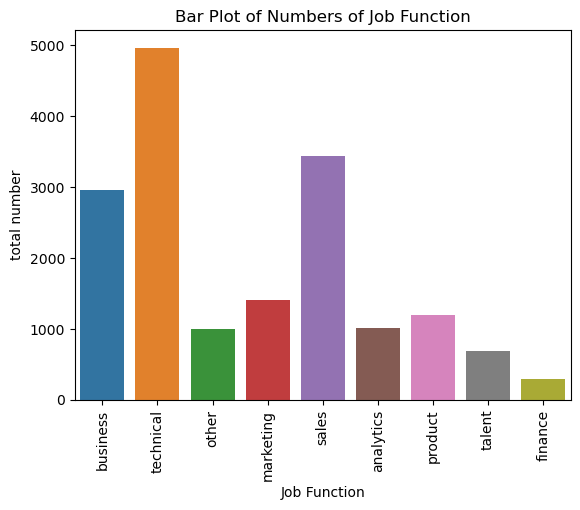

In [15]:
# In[78]:


sns.countplot(x='Function', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.xlabel('Job Function')
plt.ylabel('total number')
plt.title('Bar Plot of Numbers of Job Function')
plt.show()

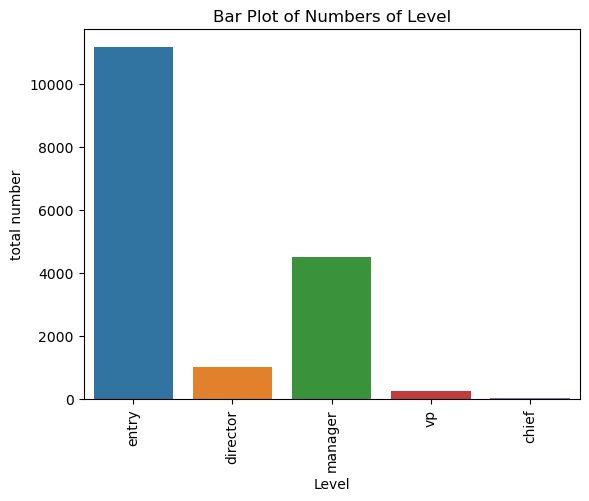

In [16]:
# In[79]:


sns.countplot(x='Level', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.xlabel('Level')
plt.ylabel('total number')
plt.title('Bar Plot of Numbers of Level')
plt.show()

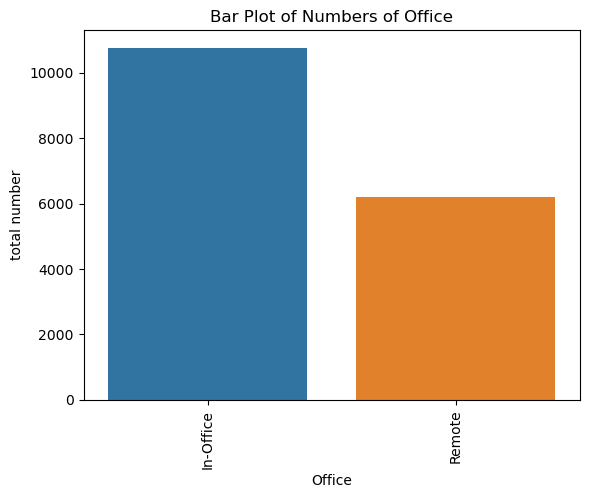

In [17]:
# In[80]:


sns.countplot(x='Office', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.xlabel('Office')
plt.ylabel('total number')
plt.title('Bar Plot of Numbers of Office')
plt.show()

In [18]:
# In[81]:


unique_company_count = df["Company"].nunique()
print(unique_company_count)

145


In [21]:
# In[82]:


# Replace 'Categorical_Column' with the actual column name you want to plot
column_name = 'Location'

# Count the occurrences of each category
category_counts = df[column_name].value_counts()

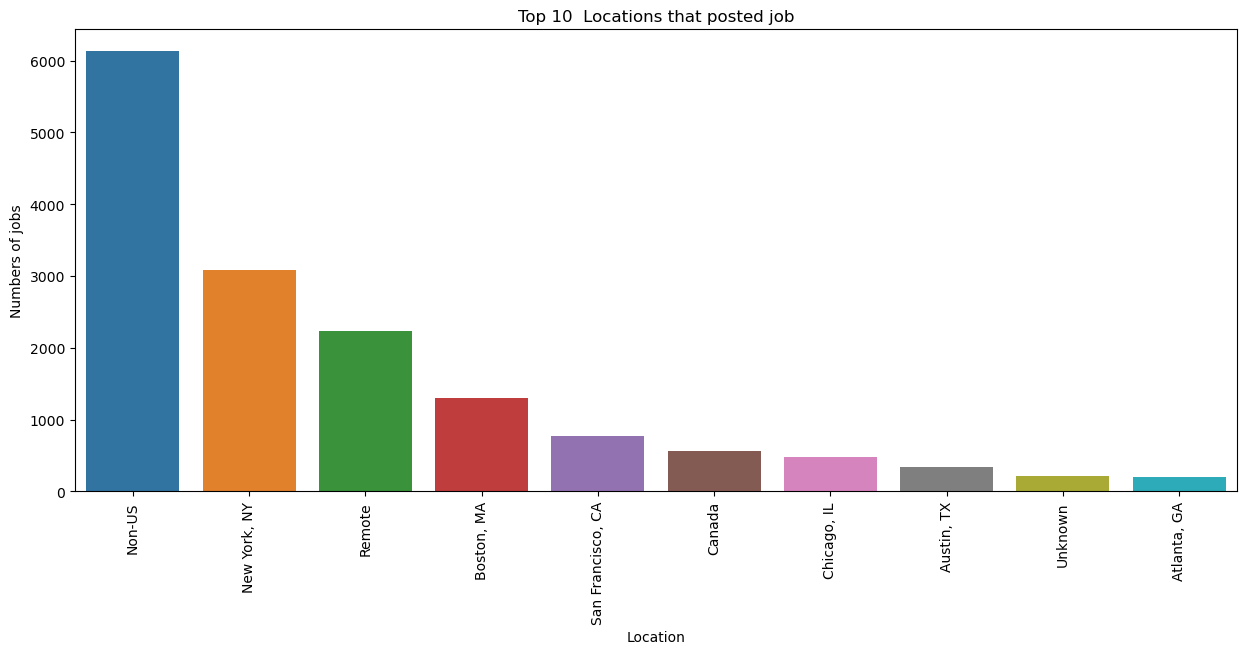

In [22]:
# Select the top N categories (e.g., top 15)
top_N = 10
top_categories = category_counts[:top_N]

# Create a bar plot for the top categories
plt.figure(figsize=(15, 6))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Numbers of jobs')
plt.title(f'Top {top_N}  {column_name}s that posted job')
plt.show()


In [23]:
# In[83]:


get_ipython().system('pip install textblob')

from textblob import TextBlob

df['sentiment'] = df['Job Description'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment'] 

0        0.178720
1        0.178720
2        0.178720
3        0.118316
4        0.208333
           ...   
16958    0.000000
16959    0.000000
16960    0.000000
16961    0.159038
16962    0.184510
Name: sentiment, Length: 16963, dtype: float64

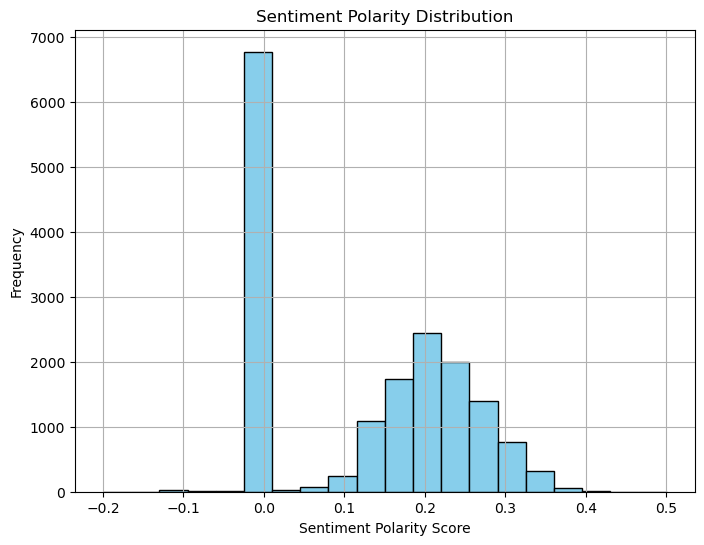

In [24]:
# The sentiment polarity scores typically range from -1 to 1, where:
# 
# Values close to -1 indicate a strongly negative sentiment.
# Values close to 1 indicate a strongly positive sentiment.
# Values close to 0 indicate a neutral sentiment

# In[84]:



# Plot a histogram of sentiment polarity scores
plt.figure(figsize=(8, 6))
plt.hist(df['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [25]:
# In[85]:


get_ipython().system('pip install tqdm')


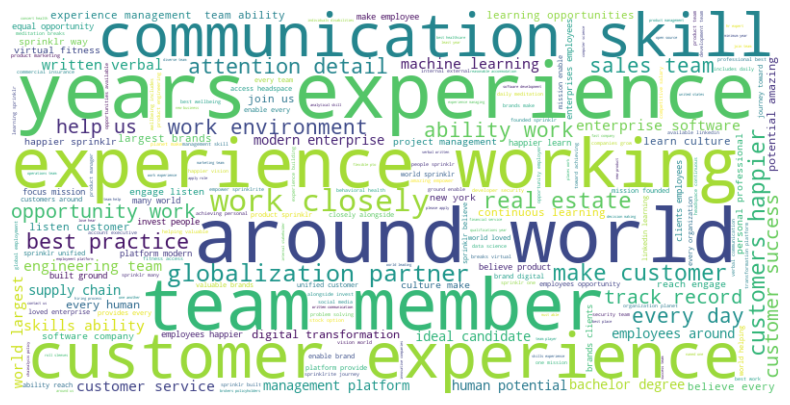

In [26]:
# In[86]:


from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Word cloud only for all data

wordcloud_data = ' '.join(df['Job Description'])  # Combine all job descriptions into one text

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()


# In[ ]:

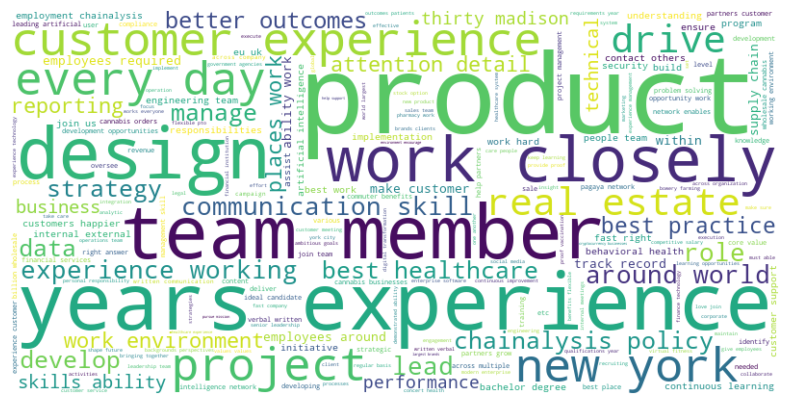

In [27]:
# In[87]:


from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Word cloud only for NY
wordcloud_data = ' '.join(ny['Job Description'])  # Combine all job descriptions into one text

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()


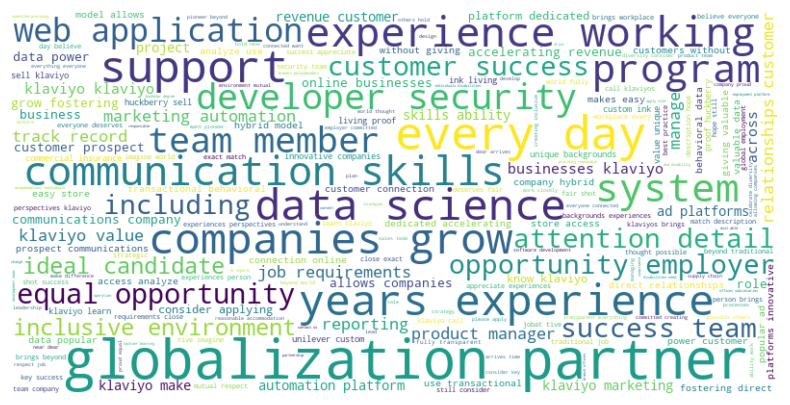

In [28]:
# In[88]:


from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Word cloud only for MA
wordcloud_data = ' '.join(ma['Job Description'])  # Combine all job descriptions into one text

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()


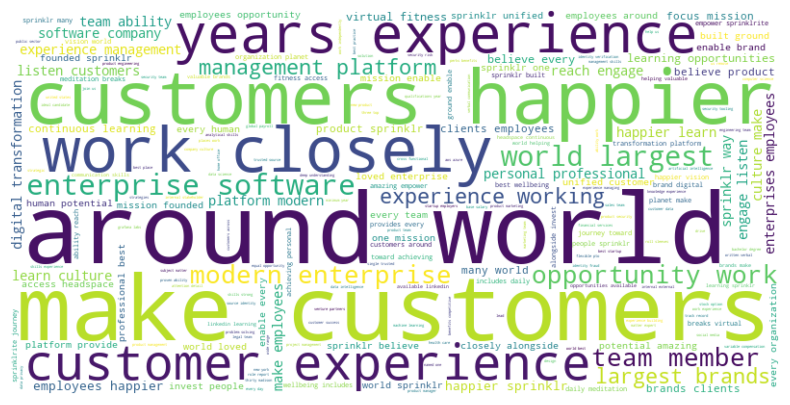

In [29]:
# In[89]:


from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Word cloud only for REMOTE
wordcloud_data = ' '.join(rmt['Job Description'])  # Combine all job descriptions into one text

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()
#Sprinklr is the most repeated thing in remote jobs, intersting!


C:\Users\sonaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


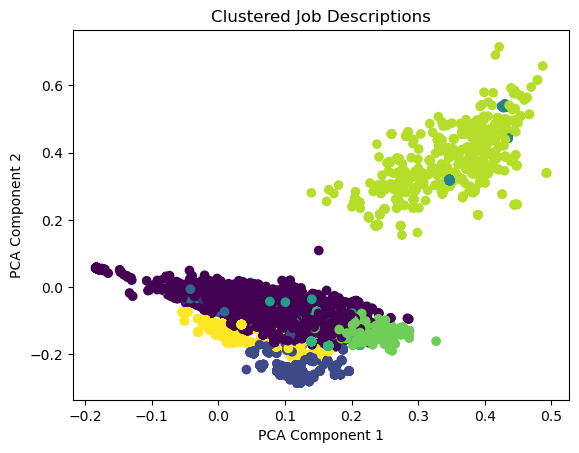

In [30]:
# In[90]:


import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Job Description'])

# Apply K-Means clustering
num_clusters = 10  # You can choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

df['pca_x'] = pca_result[:, 0]
df['pca_y'] = pca_result[:, 1]

# Plot clusters
plt.scatter(df['pca_x'], df['pca_y'], c=df['cluster'], cmap='viridis')
plt.title('Clustered Job Descriptions')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

C:\Users\sonaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sonaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sonaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sonaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

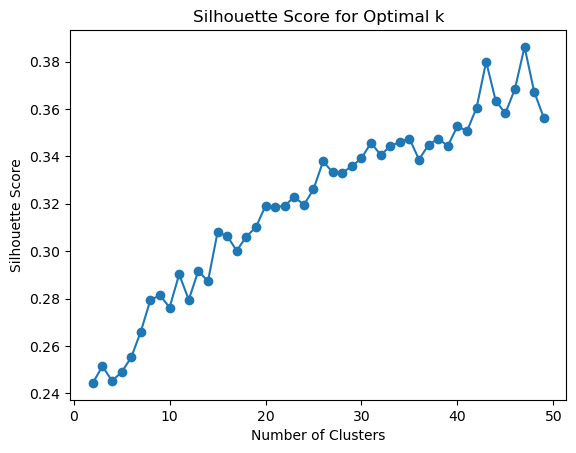

In [31]:
# In[ ]:


#I am checking what would be the best cluster to use for the cod above, the plot will give me the best cluter number, the more sillouette the better
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(tfidf_matrix)
    silhouette_scores.append(silhouette_score(tfidf_matrix, kmeans.labels_))

# Plot Silhouette Scores
plt.plot(range(2, 50), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()
#note that these are now for massachusates only


In [32]:
# In[92]:


#Latent Semantic Analysis (LSA) using scikit-learn:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


documents = df['Job Description'].tolist()

# Create a TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Perform LSA
num_topics = 10  # You can adjust the number of topics
lsa_model = TruncatedSVD(n_components=num_topics)
lsa_topic_matrix = lsa_model.fit_transform(tfidf_matrix)

# Print the top words for each topic
terms = tfidf_vectorizer.get_feature_names_out()
for i, topic in enumerate(lsa_model.components_):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [terms[idx] for idx in top_words_idx]
    print(f"Topic {i+1}: {', '.join(top_words)}")



Topic 1: sprinklr, sales, customer, data, customers, product, world, business, company, new
Topic 2: sprinklr, happier, employees, brands, world, enable, enterprise, clients, make, listen
Topic 3: corvus, insurance, commercial, brokers, cyber, corvid, soar, safer, policyholders, excited
Topic 4: orchard, corvus, home, insurance, estate, sprinklr, commercial, brokers, underwriting, real
Topic 5: snyk, security, developer, orchard, secure, corvus, cloud, 2021, applications, developers
Topic 6: chainalysis, snyk, employment, security, globalization, orchard, sales, employees, cryptocurrency, developer
Topic 7: globalization, partners, global, hr, talent, countries, branch, subsidiaries, faster, automated
Topic 8: pharmacy, globalization, capsule, healthcare, teammates, right, partners, better, global, patients
Topic 9: klaviyo, customer, customers, brings, marketing, snyk, pharmacy, experiences, sales, success
Topic 10: faire, entrepreneurs, small, local, community, leaflink, playing, pow

In [33]:
# In[93]:


# Latent Dirichlet Allocation (LDA) using the Gensim library
import pandas as pd
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

documents = df['Job Description'].tolist()

# Tokenize and preprocess the documents
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    tokens = [token for token in tokens if token.isalpha()]  # Remove non-alphabetic tokens
    tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
    return tokens

processed_documents = [preprocess_text(doc) for doc in documents]

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(processed_documents)
corpus = [dictionary.doc2bow(doc) for doc in processed_documents]

# Perform LDA
num_topics = 10  # You can adjust the number of topics
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print the top words for each topic
for i, topic in lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False):
    top_words = [word for word, _ in topic]
    print(f"Topic {i+1}: {', '.join(top_words)}")


# In[ ]:



Topic 1: klaviyo, customer, team, must, experience, cannabis, store, customers, work, retail
Topic 2: team, chainalysis, experience, lunchbox, help, employees, us, people, day, work
Topic 3: work, team, experience, partners, global, globalization, talent, platform, people, hr
Topic 4: orchard, home, experience, mortgage, ability, estate, loan, real, team, buy
Topic 5: data, faire, team, product, experience, engineering, design, entrepreneurs, business, using
Topic 6: sprinklr, world, experience, customers, every, make, employees, happier, sales, team
Topic 7: experience, team, business, management, work, data, company, ability, support, skills
Topic 8: health, care, experience, team, data, work, behavioral, time, company, tive
Topic 9: work, us, team, experience, corvus, insurance, better, role, time, everyone
Topic 10: sales, customer, marketing, product, team, experience, teams, customers, success, work
